# Welcome! This is Antonio Cervantes and Christian Pedrigal's Machine Learning Final Project!

## Implementation of an Activity Detection System

#### Fall 2021 | Feruza Amirkulova ME 297-01 | Introduction to Optimization and Machine Learning |San Jose State University

# Imports

In [1]:
import os
import numpy as np
%matplotlib widget
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Nadam
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Inputs
Data file should be a .csv file in the format of

<font color=red>feature1, feature2, feature3, ..., featureN, activity_label

Features can be from any number of XYZ axes and from either or all sensors decided by engineers, but be sure to note which order they are placed in, and the order of the sensor type.

#### Read Data Table

In [3]:
datafile = read_csv(r'.\data\finalDataTable.csv', header=0)
dataset = datafile.values

#### View Data Table

In [4]:
datafile

,AngFreqX,AngFreqY,AngFreqZ,AmpX,AmpY,AmpZ,MedJerkX,MedJerkY,MedJerkZ,LabelCol
0,2.344570,4.769465,3.453826,43.499893,29.784348,29.201104,36.246550,37.524702,38.218704,Bike
1,7.032146,14.292519,10.349982,6.386593,45.329783,2.792721,40.906822,40.193130,38.367857,Bike
2,7.032146,23.815572,3.453826,2.819911,52.104106,3.694607,48.761701,48.746860,48.556502,Bike
3,2.344570,23.815572,17.246137,2.151884,58.046007,2.368276,43.856071,43.128339,41.641957,Bike
4,4.688358,4.769465,3.453826,3.354227,50.679265,0.996908,39.248316,39.740246,39.716234,Bike
...,...,...,...,...,...,...,...,...,...,...
2477,11.161678,22.681875,16.425166,97.280707,31.785980,40.308343,53.185629,54.971847,52.154658,Walk
2478,11.719723,23.815572,17.246137,97.368660,31.141359,39.995816,42.071573,43.047521,42.430035,Walk
2479,11.719723,23.815572,17.246137,97.547687,32.242386,41.831902,49.061065,49.725893,49.762876,Walk
2480,11.719723,23.815572,17.246137,97.723831,31.206160,40.676614,53.100032,48.206290,47.133008,Walk


#### Parse the dataset and labels

In [5]:
# Set data object as all row and all columns up to the last one
data = np.array(dataset[:,:-1]).astype(float)

# Set labels object as all row of the last column
labels = dataset[:,-1]

#### Encode the labels

In [6]:
# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)

# Define the number of classes in the dataset
classes = encoded_labels[-1] + 1

#### Define the number of features and classes

In [7]:
# Define the number of features in the dataset
features = len(data[0,:])

# Define the number of classes in the dataset
classes = encoded_labels[-1] + 1

# Create Model

###### Two-Layer Nueral Network

In [79]:
def two_layer_model():
	# create model
	model = Sequential()
	model.add(Dense(40, input_dim = features, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

###### Three-Layer Nueral Network

In [90]:
def three_layer_model():
	# create model
	model = Sequential()
	model.add(Dense(40, input_dim = features, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(40, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

#### Create a Keras Classifier object

In [91]:
# Create Estimator
classifier2 = KerasClassifier(build_fn=two_layer_model)
classifier3 = KerasClassifier(build_fn=three_layer_model)

#### Create a KFold object

In [11]:
kfold = KFold(n_splits=10, shuffle=True)

#### Create a dummy labels for evaluation

In [12]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_labels = to_categorical(encoded_labels)

# Train Model

#### Fit the KerasClassifier model

In [81]:
history2 = classifier2.fit(data, encoded_labels, validation_split=0.33, epochs=300, batch_size=300, verbose=0)

In [92]:
history3 = classifier3.fit(data, encoded_labels, validation_split=0.33, epochs=300, batch_size=300, verbose=0)

#### Plot Model Loss

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
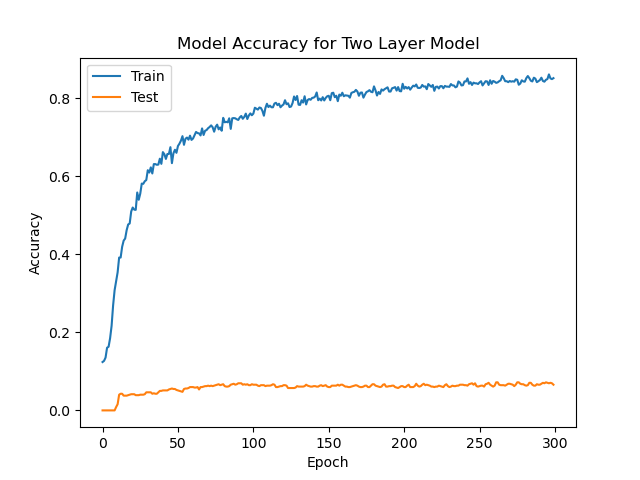

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
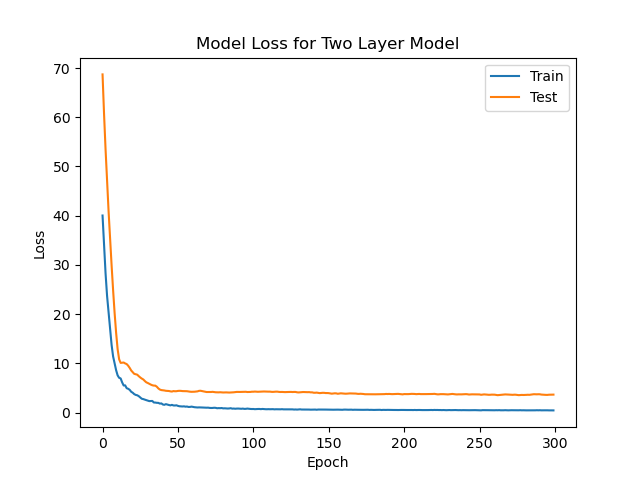

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
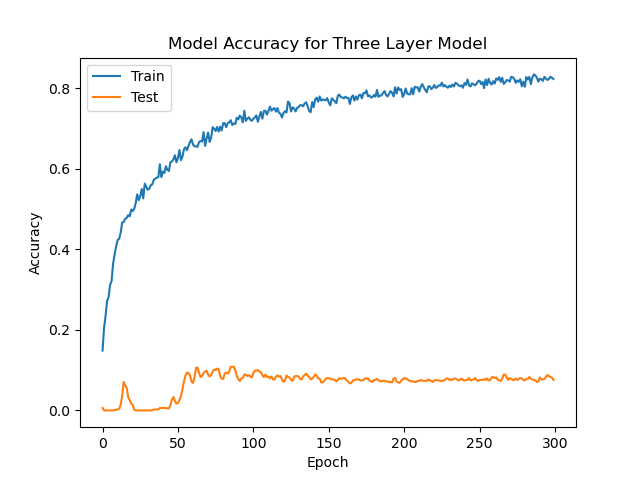

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
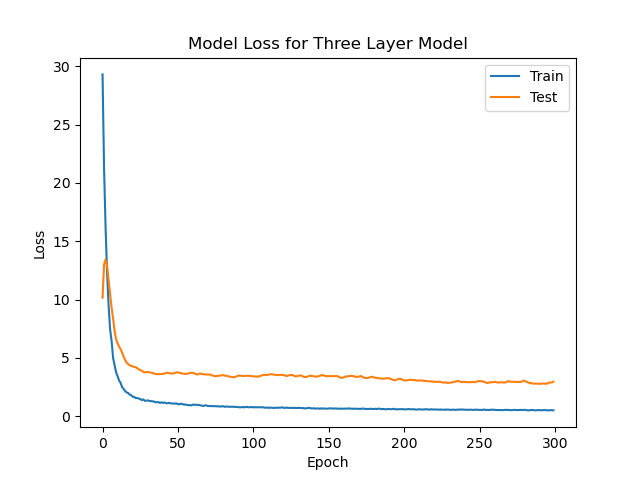

In [74]:
# summarize accuracy for two layer model
plt.clf()
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy for Two Layer Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize loss for two layer model
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss for Two Layer Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# summarize accuracy for three layer model
plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy for Three Layer Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize loss for three layer model
plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss for Three Layer Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaulate Model

#### Use Cross Valuation Score to evaluate the accuracy of the model

In [182]:
results = cross_val_score(classifier2, data, dummy_labels, cv=kfold, error_score='raise')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.8984 - accuracy: 0.7540
Accuracy: 80.10% (3.52%)


#### Display results of each KFold evaluation

In [47]:
for i in range(0,len(results)):
    print('KFold Eval: {:<3} Score: {:.2f}%'.format(i+1, results[i]*100))

KFold Eval: 1   Score: 77.91%
KFold Eval: 2   Score: 78.31%
KFold Eval: 3   Score: 87.90%
KFold Eval: 4   Score: 86.29%
KFold Eval: 5   Score: 86.69%
KFold Eval: 6   Score: 83.06%
KFold Eval: 7   Score: 82.26%
KFold Eval: 8   Score: 82.26%
KFold Eval: 9   Score: 85.89%
KFold Eval: 10  Score: 84.68%


# Predictions

#### Make predictions using test split data

In [94]:
data_train, data_test, label_train, label_test = train_test_split(data, encoded_labels, test_size=0.33, random_state=42)
pred = classifier3.predict(data_test)

#### Display predicted activities!!

In [95]:
class_names = ['Bike', 'Jumprope', 'MtnClb', 'Run', 'Squat', 'Stairs', 'Walk']

for x in range(0,len(label_test)):
    predicted_activity = class_names[pred[x]]
    actual_activity = class_names[label_test[x]]
    print('Prediction: {:<8} Label: {:<15}'.format(predicted_activity, actual_activity))

Prediction: Bike     Label: Bike           
Prediction: Jumprope Label: Jumprope       
Prediction: Run      Label: Walk           
Prediction: Jumprope Label: Walk           
Prediction: MtnClb   Label: MtnClb         
Prediction: Stairs   Label: Stairs         
Prediction: Stairs   Label: MtnClb         
Prediction: Squat    Label: Squat          
Prediction: Stairs   Label: Walk           
Prediction: Jumprope Label: Jumprope       
Prediction: Run      Label: Run            
Prediction: Jumprope Label: Jumprope       
Prediction: Stairs   Label: Walk           
Prediction: Stairs   Label: Stairs         
Prediction: MtnClb   Label: MtnClb         
Prediction: Bike     Label: Bike           
Prediction: Run      Label: Run            
Prediction: Bike     Label: Bike           
Prediction: Run      Label: Walk           
Prediction: Squat    Label: Squat          
Prediction: Jumprope Label: Walk           
Prediction: Bike     Label: Stairs         
Prediction: Squat    Label: Squa

#### Display a Confusion Matrix

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
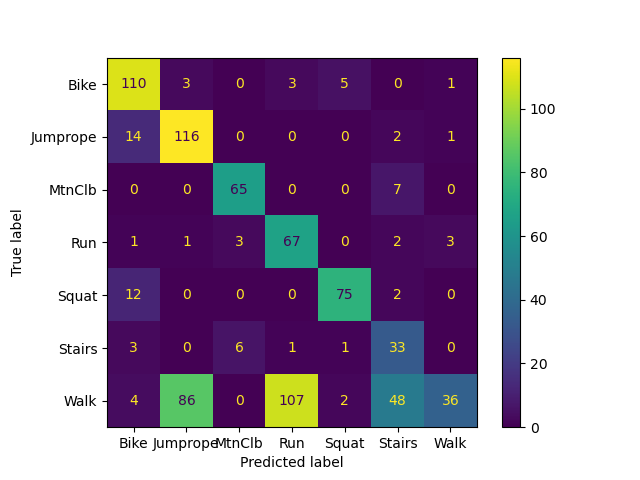

In [96]:
cm = confusion_matrix(label_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()